# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [7]:
from string import ascii_lowercase as letters

    # Creating a series, accessing indexes, values and values by their index 
    
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))     #panda series = 1D np array
print ("xs:\n", xs,'\n')                                             #but there can be heterogeneous
print ("xs indexes:",xs.index,'\n')                                 #and labelled data


    # Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')                    #indexing like a dictionari elem[key]
print (xs[['d', 'f', 'h']], '\n')                    # [[ ]] a new series with those indexes
print (type(xs[['d', 'f', 'h']]), '\n')

xs:
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [9]:
# Extracting elements and operations: same as numpy array

print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [11]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!

d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}       #heterogeneous
pd.Series(d)


b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [14]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)

print('\n')

s = s[1:] + s[:-1]     #sum on different series s[1:] doesn't have the 'a' elem
print(s)                                #s[:-1] doesn't have the 'e' elem

a    0.396771
b    0.509335
c   -0.282729
d   -0.632562
e   -1.444746
dtype: float64


a         NaN
b    1.018670
c   -0.565458
d   -1.265124
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [17]:
    # to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

    # otherwise, several notations are interpreted too
date = 'Nov 22 2021'
    # or alternatively
date = '22/11/2021 12:45:00'
print ('\n',date)

days = pd.date_range(date, periods=7, freq='D')
print ('\n',days)

seconds = pd.date_range(date, periods=3600, freq='s')
print ('\n',seconds)


2021-11-22
2021-11-22 12:45:10.000015

 22/11/2021 12:45:00

 DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')

 DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]'

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [18]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

    # internally it counts the nanoseconds from January 1st 1970
    #tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

    # when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)
                     #in datasets data and time can be format in a lot of ways, have to check
                                  

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [19]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')                        
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time

                                                    #can select data from indexes
                                                        #or from data/time

2021-11-22 12:45:00    10.687893
2021-11-23 12:45:00    10.070355
2021-11-24 12:45:00    10.299161
2021-11-25 12:45:00     9.639544
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.687893
2021-11-23 12:45:00    10.070355
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [20]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

Dataframes are collections of Pandas series

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [24]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)     #freq ='' what is varying (try also freq='s' [sec])
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,1.809628,-0.750948,-0.062682,0.956005
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,-0.321219
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,-0.335595
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,1.634623
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,-0.302847
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,0.709224
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,-0.001497
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,-0.914229
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,-1.338344
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,-0.211435


or by means of a dictionary:


In [31]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),      #useful in ML, classes to classify data
    }
    )
df2           #indexes (0-3) in this case are given by default

# check what happens if D and E had different lenghts 
      #ERROR, all the arrays must be of the same length

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [30]:
df.head(2)     #the two first lines

,A,B,C,D
2021-11-22 12:45:00,1.809628,-0.750948,-0.062682,0.956005
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,-0.321219


In [33]:
df.tail(4)      #the last four lines

,A,B,C,D
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,-0.001497
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,-0.914229
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,-1.338344
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,-0.211435


In [34]:
df.index         #indexes

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [35]:
df.columns      #indexes of columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [36]:
df.values         #values

array([[ 1.80962798e+00, -7.50948114e-01, -6.26821965e-02,
         9.56005462e-01],
       [ 1.39130177e+00, -9.98877715e-01, -8.72883549e-01,
        -3.21218620e-01],
       [-2.10875535e+00, -7.78823402e-01, -1.14649162e+00,
        -3.35595294e-01],
       [-1.38495326e+00,  5.15891785e-02,  9.44158969e-01,
         1.63462325e+00],
       [-3.53952375e-01, -4.70005956e-01,  2.66897861e-02,
        -3.02847059e-01],
       [ 4.84583273e-01, -2.32123384e-01,  3.84694502e-01,
         7.09223862e-01],
       [-1.76172969e+00, -3.85248034e-02,  4.45646798e-01,
        -1.49695149e-03],
       [-1.31923860e+00,  5.40740876e-01,  3.37597989e-01,
        -9.14228649e-01],
       [ 1.85494384e+00, -1.59099807e+00, -3.38823746e-01,
        -1.33834375e+00],
       [-7.52060148e-01,  1.68562340e+00, -5.80568325e-01,
        -2.11435369e-01]])

In [37]:
df.describe()     #"statistichal" description of the dataframe

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.214023,-0.258235,-0.086266,-0.012531
std,1.502884,0.909538,0.650679,0.886101
min,-2.108755,-1.590998,-1.146492,-1.338344
25%,-1.368525,-0.771855,-0.520132,-0.332001
50%,-0.553006,-0.351065,-0.017996,-0.257141
75%,1.164622,0.029061,0.372920,0.531544
max,1.854944,1.685623,0.944159,1.634623


In [38]:
df.T     #transpose of dataframe

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,1.809628,1.391302,-2.108755,-1.384953,-0.353952,0.484583,-1.761730,-1.319239,1.854944,-0.752060
B,-0.750948,-0.998878,-0.778823,0.051589,-0.470006,-0.232123,-0.038525,0.540741,-1.590998,1.685623
C,-0.062682,-0.872884,-1.146492,0.944159,0.026690,0.384695,0.445647,0.337598,-0.338824,-0.580568
D,0.956005,-0.321219,-0.335595,1.634623,-0.302847,0.709224,-0.001497,-0.914229,-1.338344,-0.211435


In [46]:
df.sort_index(axis=0,ascending=True)      #sort indexes

,A,B,C,D
2021-11-22 12:45:00,1.809628,-0.750948,-0.062682,0.956005
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,-0.321219
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,-0.335595
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,1.634623
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,-0.302847
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,0.709224
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,-0.001497
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,-0.914229
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,-1.338344
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,-0.211435


In [40]:
df.sort_values(by="C")      #sorting the 'C' column, crescent

,A,B,C,D
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,-0.335595
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,-0.321219
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,-0.211435
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,-1.338344
2021-11-22 12:45:00,1.809628,-0.750948,-0.062682,0.956005
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,-0.302847
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,-0.914229
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,0.709224
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,-0.001497
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,1.634623


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [41]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00    1.809628
2021-11-22 13:45:00    1.391302
2021-11-22 14:45:00   -2.108755
2021-11-22 15:45:00   -1.384953
2021-11-22 16:45:00   -0.353952
2021-11-22 17:45:00    0.484583
2021-11-22 18:45:00   -1.761730
2021-11-22 19:45:00   -1.319239
2021-11-22 20:45:00    1.854944
2021-11-22 21:45:00   -0.752060
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00    1.809628
2021-11-22 13:45:00    1.391302
2021-11-22 14:45:00   -2.108755
2021-11-22 15:45:00   -1.384953
2021-11-22 16:45:00   -0.353952
2021-11-22 17:45:00    0.484583
2021-11-22 18:45:00   -1.761730
2021-11-22 19:45:00   -1.319239
2021-11-22 20:45:00    1.854944
2021-11-22 21:45:00   -0.752060
Freq: H, Name: A, dtype: float64


In [43]:
# selecting rows by counting
print (df[0:3])

# or by index/label
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00  1.809628 -0.750948 -0.062682  0.956005
2021-11-22 13:45:00  1.391302 -0.998878 -0.872884 -0.321219
2021-11-22 14:45:00 -2.108755 -0.778823 -1.146492 -0.335595
                            A         B         C         D
2021-11-22 12:45:00  1.809628 -0.750948 -0.062682  0.956005
2021-11-22 13:45:00  1.391302 -0.998878 -0.872884 -0.321219
2021-11-22 14:45:00 -2.108755 -0.778823 -1.146492 -0.335595


### Selection by label

In [44]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.809628
B   -0.750948
C   -0.062682
D    0.956005
Name: 2021-11-22 12:45:00, dtype: float64

In [51]:
# selecting on a multi-axis by label:

df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]


,A,B
2021-11-22 12:45:00,1.809628,-0.750948
2021-11-22 13:45:00,1.391302,-0.998878
2021-11-22 14:45:00,-2.108755,-0.778823
2021-11-22 15:45:00,-1.384953,0.051589
2021-11-22 16:45:00,-0.353952,-0.470006
2021-11-22 17:45:00,0.484583,-0.232123
2021-11-22 18:45:00,-1.761730,-0.038525
2021-11-22 19:45:00,-1.319239,0.540741
2021-11-22 20:45:00,1.854944,-1.590998
2021-11-22 21:45:00,-0.752060,1.685623


In [52]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,-0.353952,-0.470006
2021-11-22 17:45:00,0.484583,-0.232123
2021-11-22 18:45:00,-1.761730,-0.038525


In [53]:
# getting an individual element
print (df.loc[dates[1],'A'])         #loc has [ row_index, column_index ]

# equivalently
print (df.at[dates[1],'A'])          #at [  row_index, column_index ]

1.391301773921856
1.391301773921856


### Selecting by position

In [54]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -1.384953
B    0.051589
C    0.944159
D    1.634623
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00 -1.384953  0.051589
2021-11-22 16:45:00 -0.353952 -0.470006


In [55]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,1.391302,-0.872884
2021-11-22 14:45:00,-2.108755,-1.146492
2021-11-22 16:45:00,-0.353952,0.026690


In [56]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  1.391302 -0.998878 -0.872884 -0.321219
2021-11-22 14:45:00 -2.108755 -0.778823 -1.146492 -0.335595 

                            B         C
2021-11-22 12:45:00 -0.750948 -0.062682
2021-11-22 13:45:00 -0.998878 -0.872884
2021-11-22 14:45:00 -0.778823 -1.146492
2021-11-22 15:45:00  0.051589  0.944159
2021-11-22 16:45:00 -0.470006  0.026690
2021-11-22 17:45:00 -0.232123  0.384695
2021-11-22 18:45:00 -0.038525  0.445647
2021-11-22 19:45:00  0.540741  0.337598
2021-11-22 20:45:00 -1.590998 -0.338824
2021-11-22 21:45:00  1.685623 -0.580568


In [57]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.9988777154650401

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [59]:
# Filter by a boolean condition on the values of a single column

df[df['B'] > 0]    

#operation in general done in parallel   --> way to go

,A,B,C,D
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,1.634623
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,-0.914229
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,-0.211435


In [61]:
df['B'] > 0         #mask, return only the true

2021-11-22 12:45:00    False
2021-11-22 13:45:00    False
2021-11-22 14:45:00    False
2021-11-22 15:45:00     True
2021-11-22 16:45:00    False
2021-11-22 17:45:00    False
2021-11-22 18:45:00    False
2021-11-22 19:45:00     True
2021-11-22 20:45:00    False
2021-11-22 21:45:00     True
Freq: H, Name: B, dtype: bool

In [60]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,1.809628,NaN,NaN,0.956005
2021-11-22 13:45:00,1.391302,NaN,NaN,NaN
2021-11-22 14:45:00,NaN,NaN,NaN,NaN
2021-11-22 15:45:00,NaN,0.051589,0.944159,1.634623
2021-11-22 16:45:00,NaN,NaN,0.026690,NaN
2021-11-22 17:45:00,0.484583,NaN,0.384695,0.709224
2021-11-22 18:45:00,NaN,NaN,0.445647,NaN
2021-11-22 19:45:00,NaN,0.540741,0.337598,NaN
2021-11-22 20:45:00,1.854944,NaN,NaN,NaN
2021-11-22 21:45:00,NaN,1.685623,NaN,NaN


In [62]:
df>0    #NaN where False

,A,B,C,D
2021-11-22 12:45:00,True,False,False,True
2021-11-22 13:45:00,True,False,False,False
2021-11-22 14:45:00,False,False,False,False
2021-11-22 15:45:00,False,True,True,True
2021-11-22 16:45:00,False,False,True,False
2021-11-22 17:45:00,True,False,True,True
2021-11-22 18:45:00,False,False,True,False
2021-11-22 19:45:00,False,True,True,False
2021-11-22 20:45:00,True,False,False,False
2021-11-22 21:45:00,False,True,False,False


### Setting

Combination of selection and setting of values

In [65]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [66]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,5,0.5,2,0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,5,1.0,4,0.999848
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,5,2.0,8,0.999391
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,10,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,12,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,14,0.998135
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,18,0.996917


In [68]:
# another example of global setting
df2=df.copy()

#df2=df  and df2=df.copy then df2 and df have the same place in memory?
#changing one equals change the other?

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-1.391302,-0.998878,-0.872884,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-1.384953,-0.051589,-0.944159,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,-0.026690,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.484583,-0.232123,-0.384695,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,-0.445647,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-1.319239,-0.540741,-0.337598,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-1.854944,-1.590998,-0.338824,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.752060,-1.685623,-0.580568,-5,-4.5,-18,-0.996917


In [69]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,5,0.5,2,0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,5,1.0,4,0.999848
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,5,2.0,8,0.999391
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,10,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,12,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,14,0.998135
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [70]:
# Dropping by column
df.drop(['E prime'], axis=1)     #drop it's not permanent

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,1.000000
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,5,0.5,0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,5,1.0,0.999848
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,5,1.5,0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,5,2.0,0.999391
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,0.998135
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,5,4.0,0.997564
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,0.996917


In [72]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,10,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,12,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,14,0.998135
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,18,0.996917


In [73]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,5,0.5,2,0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,5,1.0,4,0.999848
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,5,2.0,8,0.999391
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,10,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,12,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,14,0.998135
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,18,0.996917


In [74]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,5,0.5,2,0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,5,1.0,4,0.999848
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,5,2.0,8,0.999391
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,10,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,12,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,14,0.998135
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [75]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.391302,NaN,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,NaN,0.051589,0.944159,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,NaN,0.026690,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.484583,NaN,0.384695,5,2.5,10.0,0.999048
2021-11-22 18:45:00,NaN,NaN,0.445647,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,0.540741,0.337598,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.854944,NaN,NaN,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,1.685623,NaN,5,4.5,18.0,0.996917


In [76]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [77]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,True,True,False,True,True,False
2021-11-22 13:45:00,False,True,True,False,False,False,False
2021-11-22 14:45:00,True,True,True,False,False,False,False
2021-11-22 15:45:00,True,False,False,False,False,False,False
2021-11-22 16:45:00,True,True,False,False,False,False,False
2021-11-22 17:45:00,False,True,False,False,False,False,False
2021-11-22 18:45:00,True,True,False,False,False,False,False
2021-11-22 19:45:00,True,False,False,False,False,False,False
2021-11-22 20:45:00,False,True,True,False,False,False,False
2021-11-22 21:45:00,True,False,True,False,False,False,False


In [78]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,1.391302,0.000000,0.000000,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.000000,0.051589,0.944159,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.000000,0.000000,0.026690,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.484583,0.000000,0.384695,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.000000,0.000000,0.445647,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.000000,0.540741,0.337598,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.854944,0.000000,0.000000,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,1.685623,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [79]:
df_wNan.fillna(method='pad')       #several methods to fill missing data, 
                                    #'pad' is one of the black boxes

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.391302,NaN,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.391302,NaN,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,1.391302,0.051589,0.944159,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.391302,0.051589,0.026690,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.484583,0.051589,0.384695,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.484583,0.051589,0.445647,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.484583,0.540741,0.337598,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.854944,0.540741,0.337598,5,4.0,16.0,0.997564
2021-11-22 21:45:00,1.854944,1.685623,0.337598,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [80]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')     #mean for the rows
# columns
print (df.mean(axis=1),'\n')     #mean for the columns

A         -0.394986
B         -0.258235
C         -0.086266
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.740910
2021-11-22 13:45:00    1.145643
2021-11-22 14:45:00    0.995111
2021-11-22 15:45:00    1.872922
2021-11-22 16:45:00    2.171732
2021-11-22 17:45:00    2.733743
2021-11-22 18:45:00    2.806289
2021-11-22 19:45:00    3.293891
2021-11-22 20:45:00    3.703241
2021-11-22 21:45:00    4.121416
Freq: H, dtype: float64 



In [81]:
# global operations on columns
df.apply(np.cumsum)     #cumulative sum on columns

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 13:45:00,1.391302,-1.749826,-0.935566,10,0.5,2,1.999962
2021-11-22 14:45:00,-0.717454,-2.528649,-2.082057,15,1.5,6,2.999810
2021-11-22 15:45:00,-2.102407,-2.477060,-1.137898,20,3.0,12,3.999467
2021-11-22 16:45:00,-2.456359,-2.947066,-1.111209,25,5.0,20,4.998858
2021-11-22 17:45:00,-1.971776,-3.179189,-0.726514,30,7.5,30,5.997906
2021-11-22 18:45:00,-3.733506,-3.217714,-0.280867,35,10.5,42,6.996536
2021-11-22 19:45:00,-5.052744,-2.676973,0.056731,40,14.0,56,7.994670
2021-11-22 20:45:00,-3.197800,-4.267971,-0.282093,45,18.0,72,8.992234
2021-11-22 21:45:00,-3.949861,-2.582348,-0.862661,50,22.5,90,9.989152


In [82]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.750948,-0.062682,5,0.0,0,1.000000
2021-11-22 13:45:00,1.391302,-0.998878,-0.872884,5,0.5,2,0.999962
2021-11-22 14:45:00,-2.108755,-0.778823,-1.146492,5,1.0,4,0.999848
2021-11-22 15:45:00,-1.384953,0.051589,0.944159,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.353952,-0.470006,0.026690,5,2.0,8,0.999391
2021-11-22 17:45:00,0.484583,-0.232123,0.384695,5,2.5,10,0.999048
2021-11-22 18:45:00,-1.761730,-0.038525,0.445647,5,3.0,12,0.998630
2021-11-22 19:45:00,-1.319239,0.540741,0.337598,5,3.5,14,0.998135
2021-11-22 20:45:00,1.854944,-1.590998,-0.338824,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.752060,1.685623,-0.580568,5,4.5,18,0.996917


In [83]:
df.apply(lambda x: x.max() - x.min())

A           3.963699
B           3.276621
C           2.090651
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [84]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00   -0.750948
2021-11-22 13:45:00    0.392424
2021-11-22 14:45:00   -2.887579
2021-11-22 15:45:00   -1.333364
2021-11-22 16:45:00   -0.823958
2021-11-22 17:45:00    0.252460
2021-11-22 18:45:00   -1.800254
2021-11-22 19:45:00   -0.778498
2021-11-22 20:45:00    0.263946
2021-11-22 21:45:00    0.933563
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [3]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [87]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25       #operation on the DataFrame

In [88]:
data['timens']      #basically INSTANT

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [93]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)       #Really slow --> not efficient


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [92]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.933278,-1.293333,-0.071908,0.513663
1,-0.651074,-0.307628,-1.635691,0.139955
2,-0.784750,1.700660,-0.918566,1.406708
3,-0.591674,-1.011243,-0.706280,0.591572
4,-2.259688,1.181322,0.930588,1.012632
5,0.348420,1.067123,0.974565,1.519464
6,0.888417,-0.398754,0.873890,-2.326287
7,0.437712,-1.596249,-1.440858,-0.523271
8,-0.769122,0.792162,0.132072,-1.468945
9,0.088460,-0.701255,-1.362808,1.083624


In [94]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.933278 -1.293333 -0.071908  0.513663
 1 -0.651074 -0.307628 -1.635691  0.139955
 2 -0.784750  1.700660 -0.918566  1.406708,
           0         1         2         3
 3 -0.591674 -1.011243 -0.706280  0.591572
 4 -2.259688  1.181322  0.930588  1.012632
 5  0.348420  1.067123  0.974565  1.519464
 6  0.888417 -0.398754  0.873890 -2.326287,
           0         1         2         3
 7  0.437712 -1.596249 -1.440858 -0.523271
 8 -0.769122  0.792162  0.132072 -1.468945
 9  0.088460 -0.701255 -1.362808  1.083624]

In [95]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, NaN are added where needed

,0,1,2,3
0,0.933278,-1.293333,-0.071908,0.513663
1,-0.651074,-0.307628,-1.635691,0.139955
2,-0.784750,1.700660,-0.918566,1.406708
3,-0.591674,-1.011243,-0.706280,0.591572
4,-2.259688,1.181322,0.930588,1.012632
5,0.348420,1.067123,0.974565,1.519464
6,0.888417,-0.398754,0.873890,-2.326287
7,0.437712,-1.596249,-1.440858,-0.523271
8,-0.769122,0.792162,0.132072,-1.468945
9,0.088460,-0.701255,-1.362808,1.083624


In [97]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.933278,-1.293333,-0.071908,0.513663
1,-0.651074,-0.307628,-1.635691,0.139955
2,-0.784750,1.700660,-0.918566,1.406708
3,-0.591674,-1.011243,-0.706280,0.591572
4,-2.259688,1.181322,0.930588,1.012632
5,0.348420,1.067123,0.974565,1.519464
6,0.888417,-0.398754,0.873890,-2.326287
7,0.437712,-1.596249,-1.440858,-0.523271
8,-0.769122,0.792162,0.132072,-1.468945
9,0.088460,-0.701255,-1.362808,1.083624


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [99]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print('\n',right)

pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2

    key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [100]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.465031,-0.830404
1,bar,one,-0.568947,0.823529
2,foo,two,-1.213897,1.517631
3,bar,three,-0.791471,-2.148770
4,foo,two,0.825380,1.054338
5,bar,two,-0.811608,-2.058670
6,foo,one,0.769691,-0.985017
7,foo,three,-1.108091,-0.264769


In [101]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).

gdf.groupby('A').sum()

,C,D
A,,
bar,-2.172026,-3.383912
foo,-1.191948,0.491778


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [102]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.209927
       two      -0.931973
baz    one      -0.767405
       two       1.894158
foo    one      -1.219898
       two      -0.556716
qux    one      -1.853635
       two       0.801513
dtype: float64


In [103]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.568947  0.823529
    three -0.791471 -2.148770
    two   -0.811608 -2.058670
foo one    0.304660 -1.815421
    three -1.108091 -0.264769
    two   -0.388517  2.571968

In [104]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.568947
            D    0.823529
     three  C   -0.791471
            D   -2.148770
     two    C   -0.811608
            D   -2.058670
foo  one    C    0.304660
            D   -1.815421
     three  C   -1.108091
            D   -0.264769
     two    C   -0.388517
            D    2.571968
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

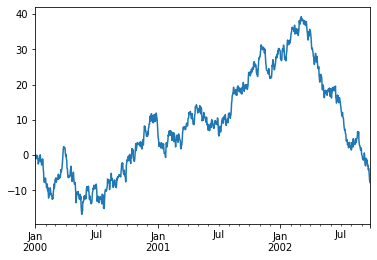

In [105]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

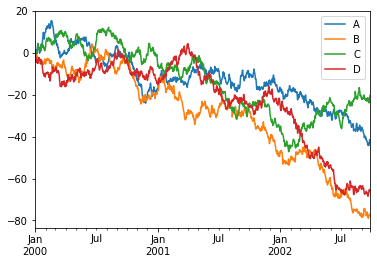

In [106]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')